# Highly Variable Gene Selection

Refs:
* Quentin Lo Giudice, Marion Leleu, Gioele La Manno, and Pierre J. Fabre. Single-cell transcriptional logic of cell-fate specification and axon guidance in early-born retinal neurons. Development (Cambridge), 146(17), 2019.

* Peter V. Kharchenko. The triumphs and limitations of computational methods for scRNA-seq. Nature Methods, 18(7):723–732, 2021


[GEO Accession GSE122466](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE122466)

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from pathlib import Path as path
import warnings
warnings.filterwarnings("ignore") # anndata deprecation warnings related to pandas and numba do not concern us.

In [3]:
import stream as st
st.__version__

'1.0'

In [4]:
import itertools as it
from markers import (
    positive_markers, # function to generate a configuration dictionnary from a set of marker genes
    states_and_markers, # Dictionnary containing phenotypes and their marker genes
)

In [5]:
st.set_figure_params(
    dpi=120,
    style='white',
    figsize=[5.4,4.8],
    rc={'image.cmap': 'viridis'}
)

In [6]:
!test -f GSE122466_Retina_Batch1_RAW.tsv || echo "Select observarions whose ID starts with Lane1_"

Select observarions whose ID starts with Lane1_


In [16]:
!test -f 'GSE122466_Retina_Batch1_RAW.tsv' || \
    wget -O 'GSE122466_Merged5347cells_RAW.csv.gz' 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE122466&format=file&file=GSE122466%5FMerged5347cells%5FRAW%2Ecsv%2Egz' && \
    echo "Import data and Select observarions whose ID starts with Lane1_"

--2024-06-27 19:45:19--  https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE122466&format=file&file=GSE122466%5FMerged5347cells%5FRAW%2Ecsv%2Egz
Resolving www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)... 2607:f220:41e:4290::110, 130.14.29.110
Connecting to www.ncbi.nlm.nih.gov (www.ncbi.nlm.nih.gov)|2607:f220:41e:4290::110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10143933 (9.7M) [application/octet-stream]
Saving to: ‘GSE122466_Merged5347cells_RAW.csv.gz’

GSE122466_Merged534 100%[===================>]   9.67M  7.07MB/s    in 1.4s    

2024-06-27 19:45:21 (7.07 MB/s) - ‘GSE122466_Merged5347cells_RAW.csv.gz’ saved [10143933/10143933]

Import data and Select observarions whose ID starts with Lane1_


In [7]:
import pandas as pd

In [17]:
merged = pd.read_csv("GSE122466_Merged5347cells_RAW.csv.gz", sep=";", index_col=0)
merged.head()

,Lane1_AAACCTGAGATGTCGG,Lane1_AAACCTGCAATCCAAC,Lane1_AAACCTGGTTCCTCCA,Lane1_AAACCTGTCCAATGGT,Lane1_AAACGGGAGGCAATTA,Lane1_AAACGGGCACCAGGCT,Lane1_AAACGGGCACGGCGTT,Lane1_AAACGGGCACTCAGGC,Lane1_AAACGGGCATCCAACA,Lane1_AAACGGGGTCCAAGTT,...,Lane2_TTTGGTTCATAAAGGT,Lane2_TTTGGTTGTGGCCCTA,Lane2_TTTGGTTTCTAACTCT,Lane2_TTTGTCAAGCGTGAAC,Lane2_TTTGTCAAGGGCTCTC,Lane2_TTTGTCAAGTACCGGA,Lane2_TTTGTCACATCGATGT,Lane2_TTTGTCAGTAGAGGAA,Lane2_TTTGTCAGTCATCCCT,Lane2_TTTGTCATCAGTTCGA
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mrpl15,3,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,0,2,1,0
Lypla1,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,2,0,5,1,2,4,1,0,0,0,...,1,3,0,1,1,0,1,1,1,0


In [18]:
lane1 = merged[merged.columns[merged.columns.str.startswith("Lane1_")]]
lane1.to_csv("GSE122466_Retina_Batch1_RAW.tsv", sep="\t")

In [22]:
_in_dir = path(".").resolve()
_publish_dir = path(".").resolve()
if not _publish_dir.exists():
    _publish_dir.mkdir()
print(f"Reading data from: {_in_dir.name}")
print(f"Saving processed data to: {_publish_dir.name}")

Reading data from: Case_Study_Early-born_Retinal_Neurons
Saving processed data to: Case_Study_Early-born_Retinal_Neurons


In [25]:
infile = _in_dir /'GSE122466_Retina_Batch1_RAW.tsv'
outfile = _publish_dir / "GSE122466_Retina_vargenes_batch1.csv"

#### Read in data

In [26]:
%%time 
adata = st.read(file_name=infile.as_posix(), workdir='./stream_result')

Saving results in: ./stream_result
CPU times: user 3.89 s, sys: 83.9 ms, total: 3.98 s
Wall time: 3.91 s


In [27]:
adata.obs_names_make_unique()
adata.var_names_make_unique()

In [28]:
adata

AnnData object with n_obs × n_vars = 2673 × 15176
    uns: 'workdir'

In [29]:
import pandas as pd

#### Calculate QC

In [30]:
st.cal_qc(adata,assay='rna')

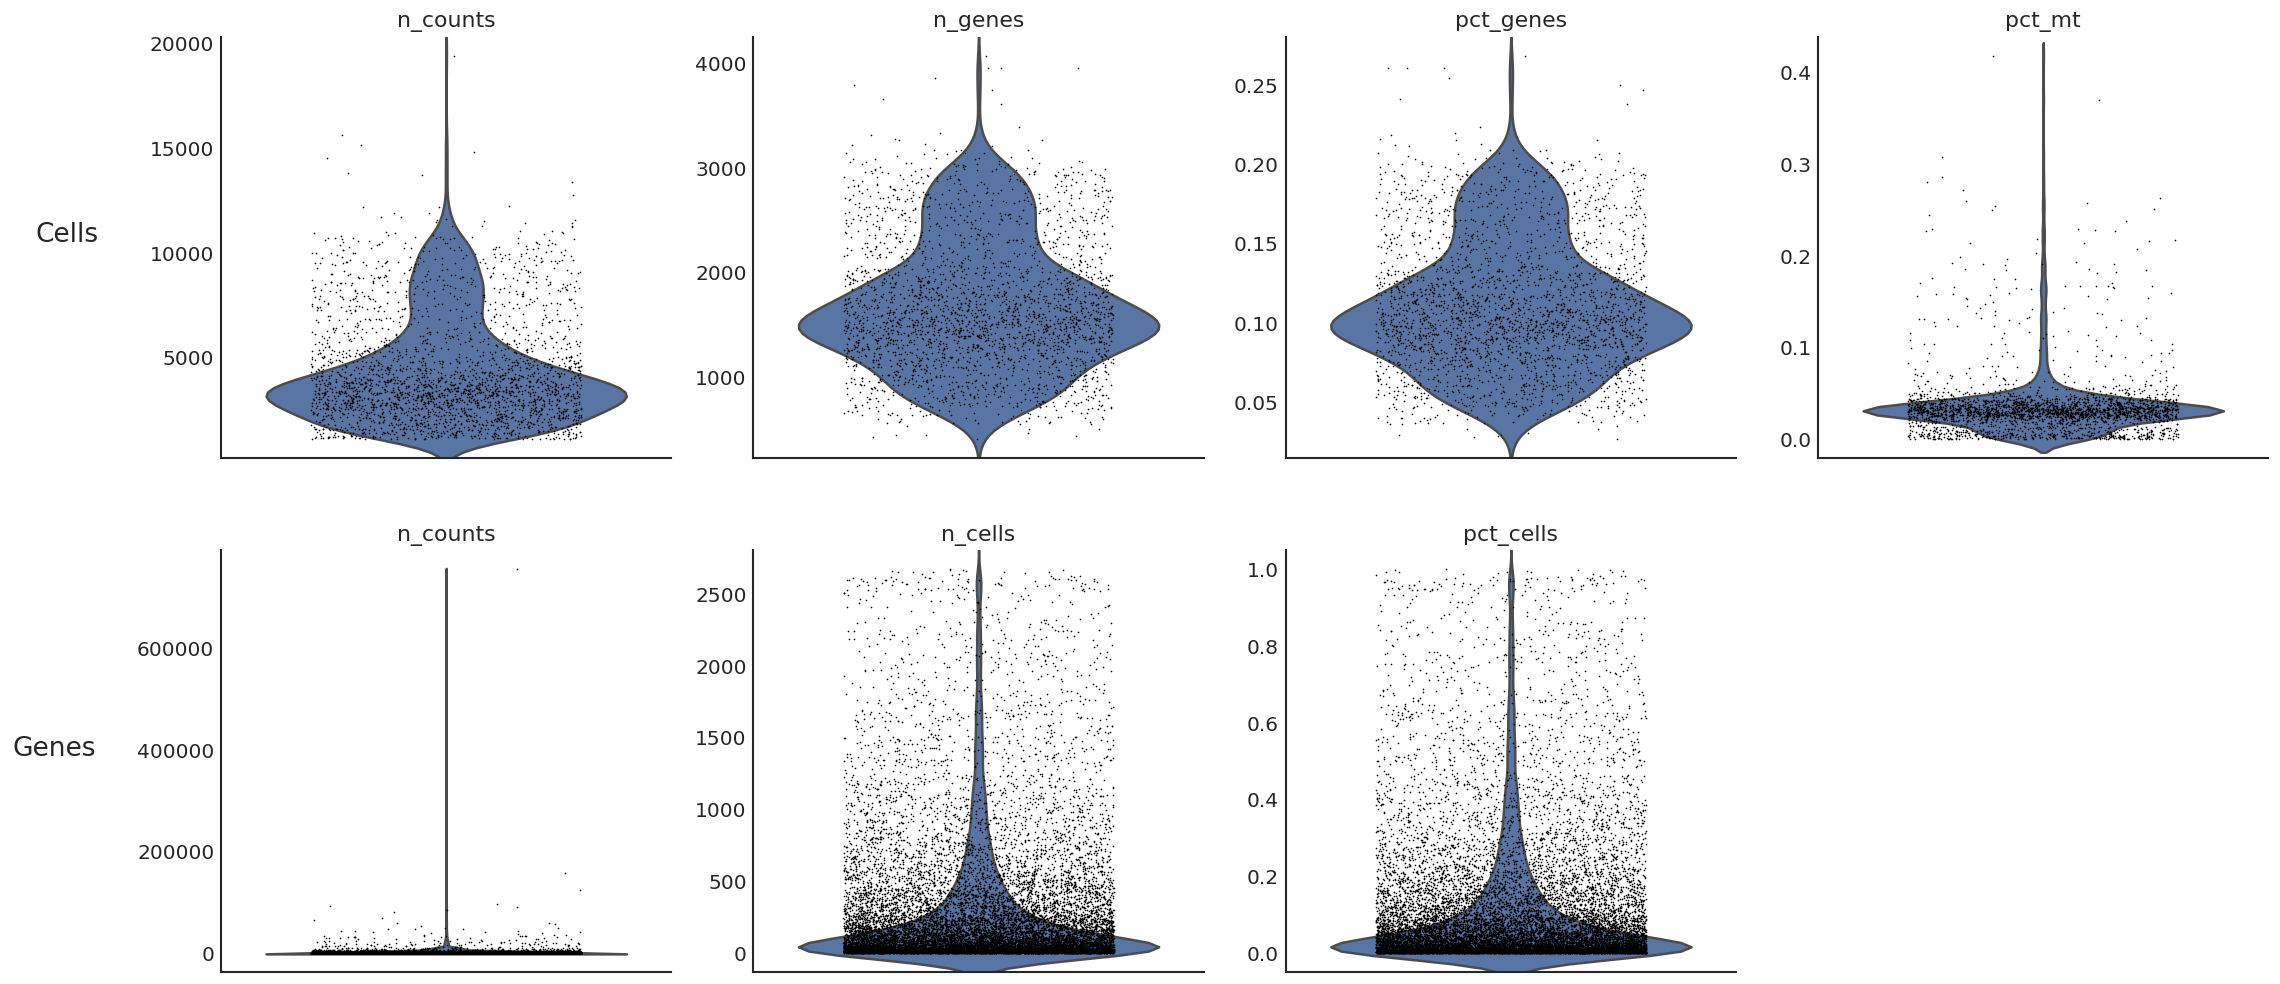

In [31]:
st.plot_qc(adata,jitter=0.3,)

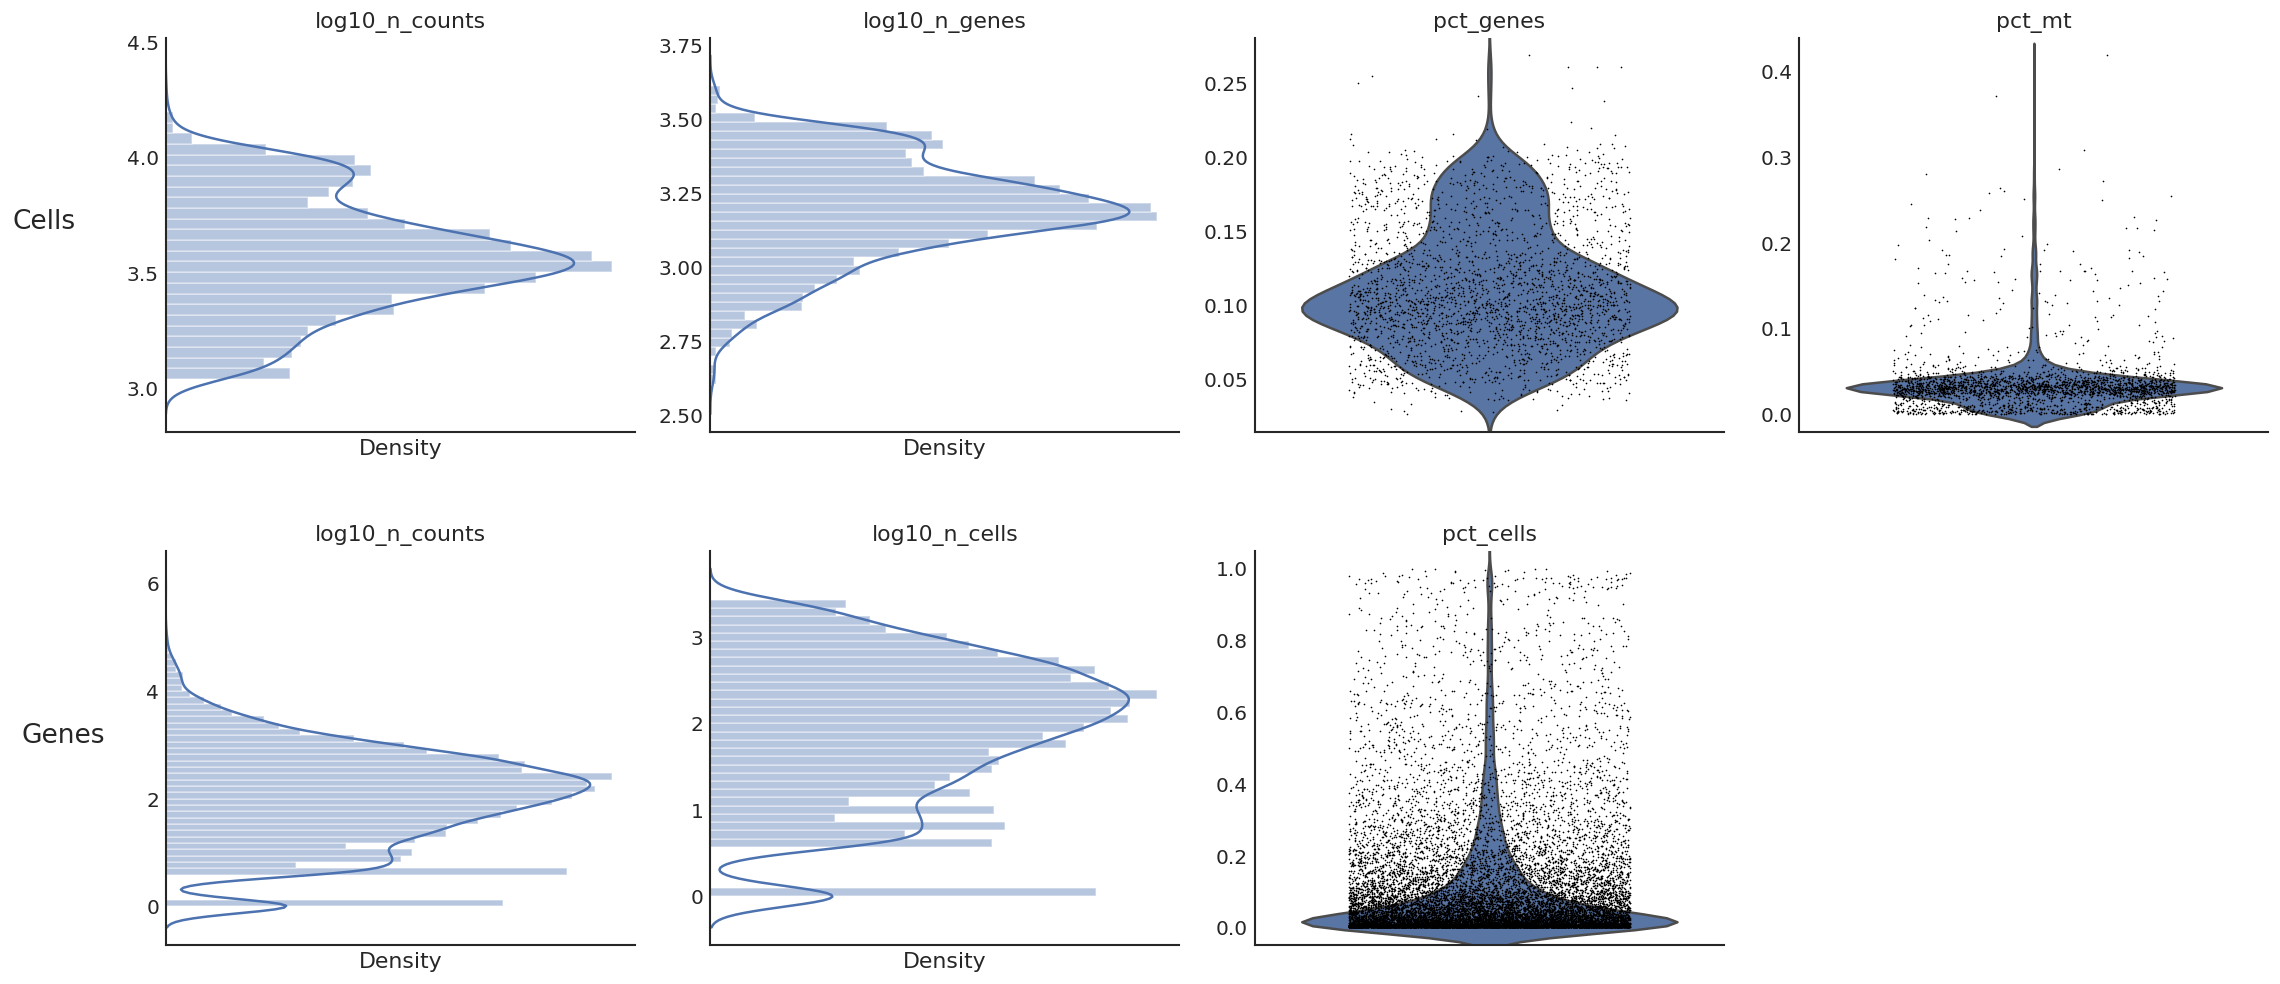

In [32]:
### histogram plots and log-scale are also supported
st.plot_qc(adata,jitter=0.3,log_scale=[0,1,4,5],hist_plot=[0,1,4,5]) 

In [33]:
# From the article
st.filter_cells(adata, min_n_features=200)
st.filter_features(adata, min_n_cells =3)

filter cells based on min_n_features
after filtering out low-quality cells: 
2673 cells, 15176 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2673 cells, 14518 genes


In [34]:
###Normalize gene expression based on library size  
st.normalize(adata,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata)
###Remove mitochondrial genes 
st.remove_mt_genes(adata)

remove mitochondrial genes:
['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4l', 'mt-Nd4', 'mt-Nd5', 'mt-Nd6', 'mt-Cytb']


#### Feature selection

Please check if the blue curve fits the points well. If not, please adjust the parameter **'loess_frac'** (usually by lowering it) until the blue curve fits well. 

1648 variable genes are selected
CPU times: user 1.79 s, sys: 384 ms, total: 2.17 s
Wall time: 3.88 s


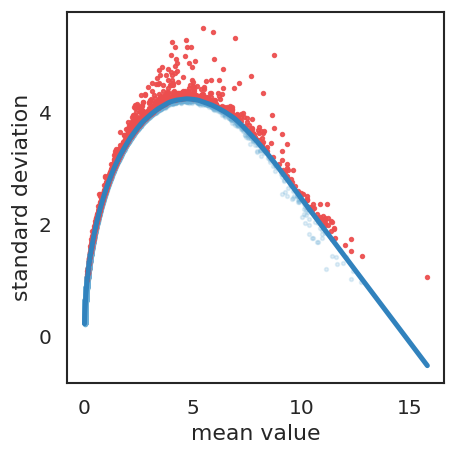

In [35]:
%%time
st.select_variable_genes(adata,loess_frac=0.01,n_genes=1648) 
# The number of variable genes is set to 1_648 because it was the number of genes kept in the original article's analyses

In [36]:
marker_genes = pd.Series(list(set(it.chain.from_iterable(states_and_markers.values()))))
len(marker_genes)

22

In [37]:
100 * marker_genes.isin(adata.var_names).mean()

100.0

In [38]:
100 * marker_genes.isin(adata.uns["var_genes"]).mean()

90.9090909090909

Not all marker genes were selected as highly variable, but they can be manually added:

In [39]:
marker_genes[~marker_genes.isin(adata.uns["var_genes"])]

14    Pou4f2
21      Rbp4
dtype: object

In [40]:
export_markers = adata.uns['var_genes'].copy(deep=True)
export_markers = export_markers.append(pd.Index(marker_genes[~marker_genes.isin(adata.uns["var_genes"])]))
export_markers

Index(['Tubb3', 'Malat1', 'Stmn2', 'Fgf15', 'Gap43', 'Xist', 'Sncg', 'Hmgb2',
       'Top2a', 'Meg3',
       ...
       'Kif14', 'Etfb', 'Prdm13', 'Cd320', 'Odf2', 'Rpl24', 'Fam98b', 'Fbxo36',
       'Pou4f2', 'Rbp4'],
      dtype='object', length=1650)

#### Save most variable genes to a new dataframe

In [41]:
# extract the genes index
var_genes = adata.uns["var_genes"]
var_genes

Index(['Tubb3', 'Malat1', 'Stmn2', 'Fgf15', 'Gap43', 'Xist', 'Sncg', 'Hmgb2',
       'Top2a', 'Meg3',
       ...
       'Wdr77', 'Actl6a', 'Kif14', 'Etfb', 'Prdm13', 'Cd320', 'Odf2', 'Rpl24',
       'Fam98b', 'Fbxo36'],
      dtype='object', length=1648)

In [43]:
[f.name for f in _publish_dir.glob("*csv")]

['GSE122466_Retina_vargenes_batch1.csv',
 'scboolseq_inferred_observations.csv',
 'dorothea_mouse_tfs.csv']

In [44]:
adata.to_df()[export_markers].to_csv(outfile.as_posix())

In [45]:
[f.name for f in _publish_dir.glob("*csv")]

['GSE122466_Retina_vargenes_batch1.csv',
 'scboolseq_inferred_observations.csv',
 'dorothea_mouse_tfs.csv']